In [33]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [34]:
!wget -nc https://raw.githubusercontent.com/highcansavci/nlp-notebooks/master/spam.csv

File ‘spam.csv’ already there; not retrieving.



In [35]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [36]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [37]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [38]:
df = df[["v1", "v2"]]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df.columns = ["labels", "data"]

In [40]:
# create binary labels
df["b_labels"] = df["labels"].map({"ham": 0, "spam": 1})

In [41]:
df_train, df_test = train_test_split(df, test_size=0.33)

In [42]:
df_train.shape, df_test.shape

((3733, 3), (1839, 3))

In [43]:
# 0 = padding
idx = 2
word2idx = {"<PAD>": 0, "<UNK>": 1}

In [44]:
for i, row in df_train.iterrows():
  tokens = row["data"].lower().split()
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = idx
      idx += 1

In [45]:
word2idx

{'<PAD>': 0,
 '<UNK>': 1,
 'you': 2,
 'only': 3,
 'hate': 4,
 'me.': 5,
 'can': 6,
 'call': 7,
 'any': 8,
 'but': 9,
 'didnt': 10,
 'accept': 11,
 'even': 12,
 'a': 13,
 'single': 14,
 'of': 15,
 'mine.': 16,
 'or': 17,
 'messaged': 18,
 'no': 19,
 'she': 20,
 'didnt.': 21,
 'i': 22,
 'will': 23,
 'search': 24,
 'online': 25,
 'and': 26,
 'let': 27,
 'know.': 28,
 "joy's": 29,
 'father': 30,
 'is': 31,
 'john.': 32,
 'then': 33,
 'john': 34,
 'the': 35,
 '____': 36,
 'father.': 37,
 'if': 38,
 'u': 39,
 'ans': 40,
 'ths': 41,
 'hav': 42,
 '&lt;#&gt;': 43,
 'iq.': 44,
 'tis': 45,
 's': 46,
 'ias': 47,
 'question': 48,
 'try': 49,
 'to': 50,
 'answer.': 51,
 'free': 52,
 'msg:': 53,
 'ringtone!from:': 54,
 'http://tms.': 55,
 'widelive.com/index.': 56,
 'wml?id=1b6a5ecef91ff9*37819&first=true18:0430-jul-05': 57,
 'pls': 58,
 'send': 59,
 'me': 60,
 'that': 61,
 'company': 62,
 'name.': 63,
 'in': 64,
 'saibaba': 65,
 'colany': 66,
 'reply': 67,
 'with': 68,
 'your': 69,
 'name': 70,
 'ad

In [46]:
len(word2idx)

10567

In [47]:
train_sentences_as_int = []
for i, row in df_train.iterrows():
  tokens = row["data"].lower().split()
  sentence_as_int = [word2idx[token] for token in tokens]
  train_sentences_as_int.append(sentence_as_int)

In [48]:
test_sentences_as_int = []
for i, row in df_test.iterrows():
  tokens = row["data"].lower().split()
  sentence_as_int = [word2idx[token] if token in word2idx else 1 for token in tokens]
  test_sentences_as_int.append(sentence_as_int)

In [49]:
len(train_sentences_as_int), len(test_sentences_as_int)

(3733, 1839)

In [50]:
def data_generator(X, Y, batch_size=32):
  X, Y = shuffle(X, Y)
  n_batches = int(np.ceil(len(Y) / batch_size))
  for i in range(n_batches):
    end = min((i + 1) * n_batches, len(Y))

    X_batch = X[i * batch_size: end]
    Y_batch = Y[i * batch_size: end]

    # pad X_batch to be N x T
    max_len = np.max([len(x) for x in X_batch])
    for j in range(len(X_batch)):
      x = X_batch[j]
      pad = [0] * (max_len - len(x))
      X_batch[j] = pad + x
    
    # convert to tensor
    X_batch = torch.from_numpy(np.array(X_batch)).long()
    Y_batch = torch.from_numpy(np.array(Y_batch)).long()

    yield X_batch, Y_batch

In [52]:
for inputs, targets in data_generator(train_sentences_as_int, df_train.b_labels):
  print(f"inputs: {inputs}, inputs.shape: {inputs.shape}")
  print(f"targets: {targets}, targets.shape: {targets.shape}")
  break

inputs: tensor([[    0,     0,     0,  ...,  2031,   135,  4784],
        [    0,     0,     0,  ...,  9181,   756, 10085],
        [    0,     0,     0,  ...,    26,   609,   704],
        ...,
        [    0,     0,     0,  ...,  2496,  2361,  1677],
        [    0,     0,     0,  ...,  3995,    26,  3996],
        [    0,     0,     0,  ...,    78,  1185,   303]]), inputs.shape: torch.Size([117, 96])
targets: tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]), targets.shape: torch.Size([117])


In [53]:
for inputs, targets in data_generator(test_sentences_as_int, df_test.b_labels):
  print(f"inputs: {inputs}, inputs.shape: {inputs.shape}")
  print(f"targets: {targets}, targets.shape: {targets.shape}")
  break

inputs: tensor([[   0,    0,    0,  ..., 8425,  517,   43],
        [   0,    0,    0,  ...,  154,   52, 2364],
        [   0,    0,    0,  ...,  107,   39,  510],
        ...,
        [   0,    0,    0,  ..., 2738,    1,    1],
        [   0,    0,    0,  ...,  264,  119,    2],
        [   0,    0,    0,  ...,  438,  527, 5813]]), inputs.shape: torch.Size([58, 37])
targets: tensor([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0]), targets.shape: torch.Size([58])


In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [63]:
# Define the model
class RNN(nn.Module):
  def __init__(self, n_vocab, embed_dim, n_hidden, n_rnnlayers, n_outputs):
    super(RNN, self).__init__()
    self.V = n_vocab
    self.D = embed_dim
    self.M = n_hidden
    self.L = n_rnnlayers
    self.K = n_outputs

    self.embed = nn.Embedding(self.V, self.D)
    self.rnn = nn.LSTM(
        input_size=self.D,
        hidden_size=self.M,
        num_layers=self.L,
        batch_first=True
    )
    self.fc = nn.Linear(self.M, self.K)

  def forward(self, X):
    # initial hidden states
    h0 = torch.zeros(self.L, X.size(0), self.M).to(device)
    c0 = torch.zeros(self.L, X.size(0), self.M).to(device)

    # embedding layer
    # turns word indexes to word layers
    out = self.embed(X)

    # get RNN unit output
    out, _ = self.rnn(out, (h0, c0))

    # max pool
    # Collapses T dimension and gives us N x M
    out, _ = torch.max(out, 1)

    # we only want h(T) at the final time step
    out = self.fc(out)
    return out

In [64]:
model = RNN(len(word2idx), 20, 15, 1, 1)
model.to(device)

RNN(
  (embed): Embedding(10567, 20)
  (rnn): LSTM(20, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
)

In [65]:
# Loss and Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

In [66]:
train_gen = lambda: data_generator(train_sentences_as_int, df_train.b_labels)
test_gen = lambda: data_generator(test_sentences_as_int, df_test.b_labels)

In [67]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for i in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_gen():
      targets = targets.view(-1, 1).float()
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward Pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and Optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())
    
    # Get train loss and test loss
    train_losses[i] = np.mean(train_loss)

    test_loss = []
    for inputs, targets in test_gen():
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.view(-1, 1).float()
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    
    test_losses[i] = np.mean(test_loss)
    dt = datetime.now() - t0

    print(f"Epoch: {i+1} / {epochs}, Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}, Duration: {dt}")
  
  return train_losses, test_losses

In [68]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, epochs=15)

Epoch: 1 / 15, Train Loss: 0.4379, Test Loss: 0.3446, Duration: 0:01:16.363255
Epoch: 2 / 15, Train Loss: 0.2403, Test Loss: 0.2219, Duration: 0:01:19.921502
Epoch: 3 / 15, Train Loss: 0.0946, Test Loss: 0.1882, Duration: 0:01:02.291666
Epoch: 4 / 15, Train Loss: 0.0451, Test Loss: 0.1716, Duration: 0:01:12.947776
Epoch: 5 / 15, Train Loss: 0.0286, Test Loss: 0.1525, Duration: 0:01:13.031681
Epoch: 6 / 15, Train Loss: 0.0193, Test Loss: 0.1900, Duration: 0:01:06.363141
Epoch: 7 / 15, Train Loss: 0.0131, Test Loss: 0.1940, Duration: 0:01:13.111775
Epoch: 8 / 15, Train Loss: 0.0120, Test Loss: 0.2284, Duration: 0:01:04.090941
Epoch: 9 / 15, Train Loss: 0.0082, Test Loss: 0.2574, Duration: 0:00:50.087311
Epoch: 10 / 15, Train Loss: 0.0074, Test Loss: 0.2156, Duration: 0:01:03.172472
Epoch: 11 / 15, Train Loss: 0.0065, Test Loss: 0.2317, Duration: 0:01:04.171713
Epoch: 12 / 15, Train Loss: 0.0050, Test Loss: 0.2314, Duration: 0:01:02.333989
Epoch: 13 / 15, Train Loss: 0.0049, Test Loss: 0.

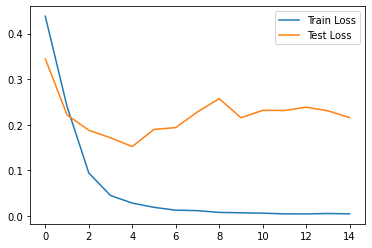

In [69]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

In [70]:
# Accuracy

n_correct = 0.
n_total = 0.

for inputs, targets in train_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward Pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts 
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.

for inputs, targets in test_gen():
  targets = targets.view(-1, 1).float()
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward Pass
  outputs = model(inputs)

  # Get prediction
  predictions = (outputs > 0)

  # update counts 
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9998, Test Accuracy: 0.9541
